# Horror Movie Analysis

In [5]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats

# File to Load (Remember to Change These)
horro_movies_to_load = "resources/IMDB Horror movies.csv"

# Read horror movie Data File and store into Pandas DataFrames
horror_movie_data = pd.read_csv(horro_movies_to_load)

# Combine the data into a single dataset.  
# movie_data_merge = pd.merge(horror_movie_data, <highest grossing>, how="left", on=["?", "?"])
horror_movie_data.head()

,Title,Genres,Release Date,Release Country,Movie Rating,Review Rating,Movie Run Time,Plot,Cast,Language,Filming Locations,Budget
0,Gut (2012),Drama| Horror| Thriller,26-Oct-12,USA,NaN,3.9,91 min,"Directed by Elias. With Jason Vail, Nicholas W...",Jason Vail|Nicholas Wilder|Sarah Schoofs|Kirst...,English,"New York, USA",NaN
1,The Haunting of Mia Moss (2017),Horror,13-Jan-17,USA,NaN,NaN,NaN,"Directed by Jake Zelch. With Nicola Fiore, Bri...",Nicola Fiore|Brinke Stevens|Curtis Carnahan|Ja...,English,NaN,"$30,000"
2,Sleepwalking (2017),Horror,21-Oct-17,Canada,NaN,NaN,NaN,"Directed by David Briggs. With Alysia Topol, A...",Alysia Topol|Anthony Makela|Kelsi Ashley|Patri...,English,"Sudbury, Ontario, Canada",NaN
3,Treasure Chest of Horrors II (2013),Comedy| Horror| Thriller,23-Apr-13,USA,NOT RATED,3.7,82 min,"Directed by M. Kelley, Shawn C. Phillips, Alex...",Veronica Ricci|Nicholas Adam Clark|James Culle...,English,"Baltimore, Maryland, USA",NaN
4,Infidus (2015),Crime| Drama| Horror,10-Apr-15,USA,NaN,5.8,80 min,"Directed by Giulio De Santi. With Bonini Mino,...",Bonini Mino|Massimo Caratelli|Maurizio Zaffino...,Italian,NaN,NaN


The r-squared is: 0.051006108742306266


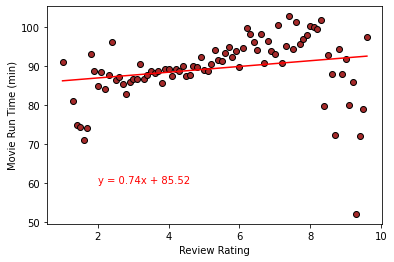

In [15]:
#Rating vs Movie Duration - Danielle

#create dataframe for 1st question
dtq1_df=horror_movie_data[["Review Rating", "Movie Run Time"]].copy()

#Drop any line of data that has NaN this reduces the data down to just over 1000 data points
dtq1_df.dropna(how="any", inplace=True)

#Change string data to int
dtq1_df["Movie Run Time"] = dtq1_df["Movie Run Time"].str.replace("min","").astype(int)

#calculate average rating and rest index
avg_rating=dtq1_df.groupby(['Review Rating']).mean()
avg_rating.reset_index(drop=False, inplace=True)
avg_rating

#set x and y values
x_values = avg_rating["Review Rating"]
y_values = avg_rating["Movie Run Time"]

#set up trend line and scatter plot
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
fig1, ax1 = plt.subplots()
plt.scatter(x_values,y_values, facecolor="brown", edgecolor="black")
plt.xlabel("Review Rating")
plt.ylabel("Movie Run Time (min)")
plt.plot(x_values,regress_values,"r-")
ax1.annotate(line_eq, (2, 60), color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()